In [12]:


import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
 

In [13]:
import gzip
import pickle

X, y = pickle.load(gzip.open('/content/flatland_train.data', 'rb'))
y[y != 0] -= 2

X = X.reshape(X.shape[0], 50, 50, 1) / 255


In [14]:

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(BatchNormalization(axis=-1))   # Axis -1 is always the features axis
model.add(Activation("relu"))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 32)       

In [15]:
loss = model.fit(X, y, epochs=10, validation_split=0.1)

Epoch 1/10
282/282 [==============================] - 2s 7ms/step - loss: 1.2746 - accuracy: 0.4720 - val_loss: 1.5722 - val_accuracy: 0.1850
Epoch 2/10
282/282 [==============================] - 2s 6ms/step - loss: 0.6674 - accuracy: 0.7262 - val_loss: 0.9832 - val_accuracy: 0.5830
Epoch 3/10
282/282 [==============================] - 2s 6ms/step - loss: 0.3691 - accuracy: 0.8587 - val_loss: 0.3319 - val_accuracy: 0.8760
Epoch 4/10
282/282 [==============================] - 2s 6ms/step - loss: 0.2140 - accuracy: 0.9254 - val_loss: 0.1923 - val_accuracy: 0.9470
Epoch 5/10
282/282 [==============================] - 2s 6ms/step - loss: 0.1229 - accuracy: 0.9607 - val_loss: 0.1545 - val_accuracy: 0.9340
Epoch 6/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0752 - accuracy: 0.9788 - val_loss: 0.0783 - val_accuracy: 0.9740
Epoch 7/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0561 - accuracy: 0.9838 - val_loss: 0.0800 - val_accuracy: 0.9780
Epoch 

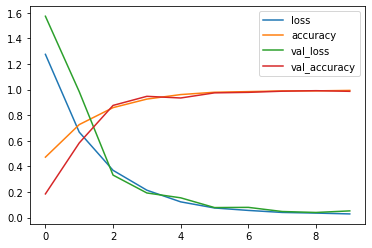

In [16]:
pd.DataFrame(loss.history).plot()


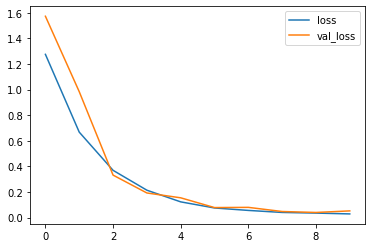

In [17]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [11]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 99.22%
